<a href="https://colab.research.google.com/github/Ajogeorge29/Dentomaxillofacial_radiology/blob/main/ML_IN_SMT_THESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing and Feature Engineering

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_excel('/content/EXCEL DATA ENTRY ENTRY  thesis.xlsx')



In [ ]:
# Print the column names to verify the structure of your DataFrame
print(data.columns)


Index(['GENDER', 'AGEYEARS', 'TOOTHTYPE', 'DISTANCE_FROM_FLOOR', 'SMT_CASES',
       'BP_OF_PATHOLOGY', 'CBCTPAI_SCORES', 'CONTROL_TOOTH', 'CONTROL_SMT',
       'TYPE_OF_SMT', 'AGE_GROUPING'],
      dtype='object')


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # Male-1, Female-2
data['TOOTHTYPE'] = label_encoder.fit_transform(data['TOOTHTYPE'])
data['TYPE_OF_SMT'] = label_encoder.fit_transform(data['TYPE_OF_SMT'])

# Standardize continuous variables (optional, depending on model requirements)
scaler = StandardScaler()
data[['AGEYEARS', 'CBCTPAI_SCORES']] = scaler.fit_transform(data[['AGEYEARS', 'CBCTPAI_SCORES']])

# Splitting data into features and target for different objectives
features = data[['GENDER', 'AGEYEARS', 'TOOTHTYPE', 'CBCTPAI_SCORES']]
target_smt_class = data['TYPE_OF_SMT']  # Target for SMT classification
target_lesion_extent = data['CBCTPAI_SCORES']  # Target for lesion extent prediction

# Train-test split for classification and regression
X_train, X_test, y_train_smt, y_test_smt = train_test_split(features, target_smt_class, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_lesion, y_test_lesion = train_test_split(features, target_lesion_extent, test_size=0.2, random_state=42)


Correlation Analysis

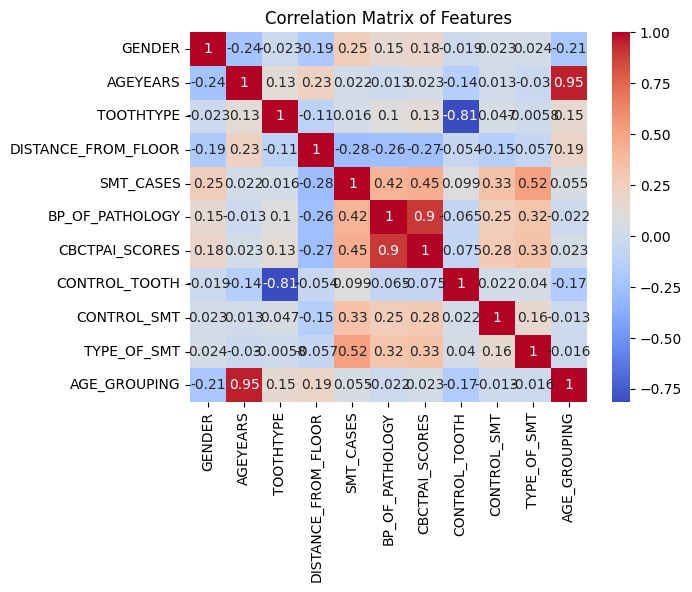

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating Pearson correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()


3. SMT Classification Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train_smt)

# Predictions and Evaluation
y_pred_smt = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test_smt, y_pred_smt))
print("Classification Report:\n", classification_report(y_test_smt, y_pred_smt))
print("Confusion Matrix:\n", confusion_matrix(y_test_smt, y_pred_smt))


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.57      0.73         7

    accuracy                           0.88        25
   macro avg       0.93      0.79      0.83        25
weighted avg       0.90      0.88      0.87        25

Confusion Matrix:
 [[18  0]
 [ 3  4]]


4. Lesion Extent Prediction Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_l, y_train_lesion)

# Predictions and Evaluation
y_pred_lesion = regressor.predict(X_test_l)
print("Mean Squared Error:", mean_squared_error(y_test_lesion, y_pred_lesion))
print("R2 Score:", r2_score(y_test_lesion, y_pred_lesion))


Mean Squared Error: 5.757634787414783e-05
R2 Score: 0.9999383802816901


5. Model Validation and Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for the RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_smt)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.866842105263158


6. Results Visualization

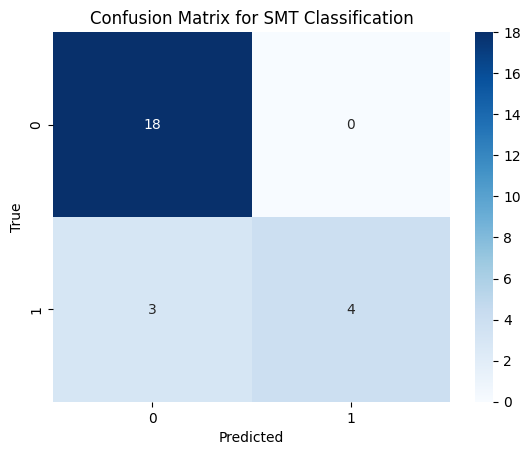

In [ ]:
# Visualizing the Confusion Matrix for SMT Classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_smt, y_pred_smt)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix for SMT Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## STEP 02